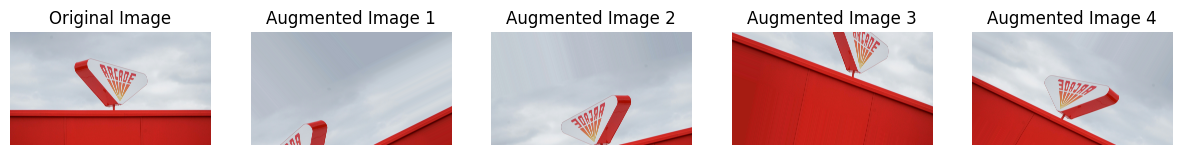

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Define the path to your image
image_path = 'blabla.jpg'  # Replace with your image path

# Check if the file exists
if not os.path.isfile(image_path):
    raise FileNotFoundError(f"Image file not found at path: {image_path}")

# Create an instance of ImageDataGenerator with multiple augmentation techniques
datagen = ImageDataGenerator(
    rotation_range=40,       # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,   # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,         # Randomly apply shearing transformations
    zoom_range=0.2,          # Randomly zoom into images by up to 20%
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill in pixels that are newly created during transformations
)

# Load and preprocess the image
image = tf.keras.preprocessing.image.load_img(image_path)
image = tf.keras.preprocessing.image.img_to_array(image)
image = np.expand_dims(image, axis=0)  # Convert image to a batch of size 1

# Apply augmentations
augmented_images = datagen.flow(image, batch_size=1)

# Plot the original and augmented images
plt.figure(figsize=(15, 15))

# Plot the original image
plt.subplot(1, 5, 1)
plt.imshow(image[0].astype('uint8'))
plt.title('Original Image')
plt.axis('off')

# Plot a few augmented images
for i in range(4):
    plt.subplot(1, 5, i + 2)
    batch = next(augmented_images)  # Use next() to get the next batch
    augmented_image = batch[0].astype('uint8')
    plt.imshow(augmented_image)
    plt.title(f'Augmented Image {i+1}')
    plt.axis('off')

plt.show()